# **Not an ideal network, which is dealed to be an ideal network**

In [1]:
import keras

Using TensorFlow backend.


In [0]:
# https://keras.io/
# !pip install -q keras               # colab comes with keras installed. So commenting this line which is not required
import keras                          # importing keras, the framework used for training in this file

In [0]:
# importing all the required libraries and functions
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [5]:
# keras.datasets provides us inbuilt mnist dataset which is divided into training and test set. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


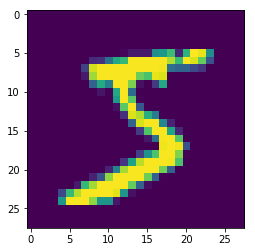

In [6]:
# checking the dimension of train data
print (X_train.shape)

# importing the plt function from matplotlib library and visualising the first data of training data
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# adding one more dimension to the data which is nothing but number of channels in input image 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# this step is done to normalize the values to range of (0,1) by dividing by 255. To get floating point output the type of intial values were changed to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# the real class category of first 10 train data
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# this step is done because softmax output will have the dimension of total number of unique classes. To match with that the output is changed to one-hot-encoded format
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))    # receptive field global = 3x3, input dimension = 28x28x1
model.add(Convolution2D(64, 3, 3, activation='relu'))                           # receptive field global = 5x5, input dimension = 26x26x32
model.add(Convolution2D(128, 3, 3, activation='relu'))                          # receptive field global = 7x7, input dimension = 24x24x64
model.add(MaxPooling2D(pool_size=(2, 2)))                                       # receptive field global = 14x14, input dimension = 22x22x128

model.add(Convolution2D(256, 3, 3, activation='relu'))                          # receptive field global = 16x16, input dimension = 11x11x128
model.add(Convolution2D(512, 3, 3, activation='relu'))                          # receptive field global = 18x18, input dimension = 9x9x256
model.add(Convolution2D(1024, 3, 3, activation='relu'))                         # receptive field global = 20x20, input dimension = 7x7x512
model.add(Convolution2D(2048, 3, 3, activation='relu'))                         # receptive field global = 22x22, input dimension = 5x5x1024
model.add(Convolution2D(10, 3, 3, activation='relu'))                           # receptive field global = 24x24, input dimension = 3x3x2048

model.add(Flatten())                                                            # receptive field global = 28x28, input dimension = 1x1x10
model.add(Activation('softmax'))

model.summary()

W0731 22:45:34.246327 140207225079680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0731 22:45:34.299522 140207225079680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 22:45:34.307117 140207225079680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.

In [16]:
# compiling the model with the mentioned parameters
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0731 22:45:39.355403 140207225079680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0731 22:45:39.384896 140207225079680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
# training the compiled model on the given train dataset
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0731 22:45:43.031707 140207225079680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0731 22:45:43.114494 140207225079680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

In [0]:
# to evaluate the score of the trained model on test dataset
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

The problem with the above network is the output of the final convolution is directly given to the softmax layer. What the convolution blocks do is that they get features out of the image. But we need something to make sense out of the features. That's why we need the dense layer in between the last convolution(flattened) and softmax layer. If we make the requied change the accuracy improves significantly. 

In [0]:
from keras.layers import Dense

In [22]:
# the changed network architecture
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))    
model.add(Convolution2D(64, 3, 3, activation='relu'))                           
model.add(Convolution2D(128, 3, 3, activation='relu'))                          
model.add(MaxPooling2D(pool_size=(2, 2)))                                       

model.add(Convolution2D(256, 3, 3, activation='relu'))                          
model.add(Convolution2D(512, 3, 3, activation='relu'))                          
model.add(Convolution2D(1024, 3, 3, activation='relu'))                         
model.add(Convolution2D(2048, 3, 3, activation='relu'))                         
model.add(Convolution2D(10, 3, 3, activation='relu'))      

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3

In [0]:
# compiling the model with the mentioned parameters
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
# training the compiled model on the given train dataset
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.3175 - acc: 0.8988
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0798 - acc: 0.9793
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0623 - acc: 0.9843
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0451 - acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0397 - acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0315 - acc: 0.9920
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0321 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0265 - acc: 0.9936
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0278 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0210 - a

In [0]:
# to evaluate the score of the trained model on test dataset
score = model.evaluate(X_test, Y_test, verbose=0)

In [26]:
print(score)

[0.036039554653479446, 0.9919]


In [0]:
y_pred = model.predict(X_test)

In [28]:
print(y_pred[:9])
print(y_test[:9])

[[2.70271774e-11 2.65050062e-07 1.15674084e-06 3.93553939e-10
  9.60851366e-07 2.53285466e-11 3.20161386e-15 9.99996901e-01
  3.84302173e-11 7.11372195e-07]
 [4.49804460e-09 1.07875837e-06 9.99996781e-01 2.00453876e-08
  3.52869925e-12 5.25875510e-10 1.71443360e-10 2.13644716e-06
  3.36850228e-08 4.36729394e-17]
 [7.30362038e-12 9.99999642e-01 3.59902998e-07 9.71611420e-12
  1.86972139e-11 1.51827823e-12 5.00816662e-12 2.32906500e-10
  5.45597179e-10 8.33729278e-15]
 [9.99390244e-01 5.17093140e-05 2.79923515e-05 2.97403666e-08
  8.29660075e-06 3.13495091e-10 5.13303326e-04 4.67608591e-12
  8.47582214e-06 1.34950007e-08]
 [2.10220128e-17 2.50528020e-16 3.61812395e-21 2.73868143e-33
  9.99997497e-01 2.48678357e-13 2.41200855e-08 3.70513464e-09
  7.94087357e-14 2.54687484e-06]
 [3.21599272e-16 1.00000000e+00 7.78187292e-09 3.98877185e-16
  1.03704726e-14 2.37908683e-18 4.31990310e-17 1.32588894e-12
  2.58106280e-13 1.53230181e-19]
 [1.96569621e-13 1.14397933e-12 2.41357724e-16 1.05696219e